# Your info

Full name: MohammadHossein Karimian

Student ID: 97521468

# Q1. Kohonen

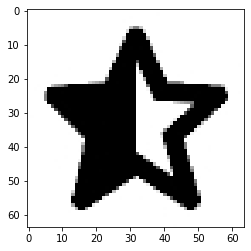

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


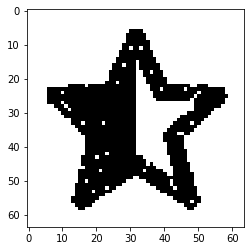

In [6]:
# Q1_graded
# Do not change the above line.

from PIL import Image
import numpy as np
import urllib.request
import matplotlib.pyplot as plt #Used in the comparison below

urllib.request.urlretrieve(
  'https://raw.githubusercontent.com/mohammadhosseinkarimian/ci/main/input.jpg',
   "input.jpg")
  
im = Image.open("input.jpg")
neurons = 64*64
size = 64
learning_rate = 0.2
sigma = 16
epochs = 500

pic = np.array(im)



plt.imshow(pic)
plt.show()
im.close()
weights = np.zeros((neurons, 3)) 
weights += 255
#weights = np.random.rand(neurons)
#weights[weights>0.5] = 1
#weights[weights<0.5] = 0 
#weights = weights.reshape((neurons, 1))
inputs = pic.reshape(neurons,3)
ss=[]

#print(pic)
#print(pic.shape)
#pic = pic.reshape(64,64)
#plt.imshow(pic,cmap=matplotlib.cm.Greys_r)
#plt.show()

length = 1024
length_sqrt = int(np.sqrt(length))
def find_dists(a, index):
    i,j = np.indices(a.shape, sparse=True)
    return (i-index[0])**2 + (j-index[1])**2

def convert_reshape(a):
    a0 = (int) (a/length_sqrt)
    a1 = a % length_sqrt
    return a0, a1


for e in range(epochs):
  index = np.random.choice(neurons, length, replace=False)
  rand_inputs=inputs[index]
  rand_weights=weights[index]
  learning_rate *= 0.95
  for x in range(length):
      # find best neuron 
      arg_bmu = np.argmin(np.sum(np.square(np.subtract(rand_weights[x], rand_inputs[x]))))
        
      # find dist vector from all neurons to bmu
      dist = find_dists(np.zeros((length_sqrt,length_sqrt)), tuple(convert_reshape(arg_bmu))).reshape(-1,1)
      # update weights
      rand_weights += np.multiply(rand_inputs - rand_weights, np.exp((-dist)/(2*(sigma)**2)))*learning_rate
      weights[index]=rand_weights


# show results (by weights)
weights = weights.reshape(size,size,3)
plt.imshow(weights)
plt.show()


#print(inputs)
#plt.imshow(inputs.reshape(size,size,3))
#plt.show()



In the first step, we need to use the image of the input in Colab.In order to do that, I uploaded this picture to my GitHub and then, read an image with the url of that photo.
Then we have to define our neorons , inputs and their sizes.Our input image is 64x64 pixel.So we will have a [4096 x 3] Numpy Array which has three variables for RGB of every pixel in the image.Our weights should be this size too, so we create another Numpy Array for our weightsand we will set its values to 255.Because it is said to set our weights to white in the beginning of the process.
After that we define a number for length which is the number of pixels we use at each epoch.We defined a method for finding the distance.Then we implemented the algorithm for Kohonen .At each epoch after assigning some random elements of our inputs, to our rand_inputs, we will find the best maching weight vector for each of our rand_inputs,Then by calculating the distance by our function, we update our weight.Finally we reshape our weights to a [64x64x3] Numpy Array so it can be shown in the plot.

# Q2.1 RBF

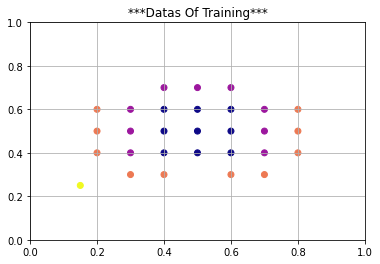

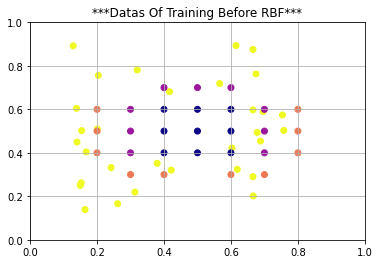

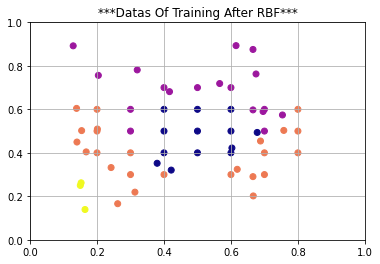

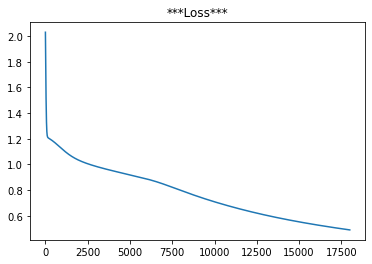

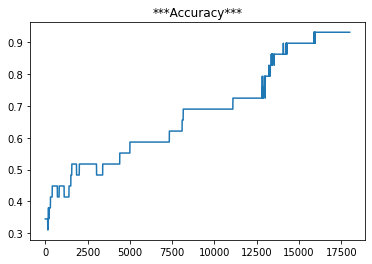

In [7]:
# Q2.1_graded
# Do not change the above line.

import numpy as np
import keras
from keras import backend as bc
from keras.layers import Layer

from matplotlib import pyplot as plt

#input dots on the given image
train_x = np.array([[0.5,0.5], [0.6,0.5], [0.4,0.6], [0.5,0.6],[0.4,0.4], [0.5,0.4], [0.6,0.4], [0.4,0.5], [0.6,0.6], [0.15, 0.25],[0.2, 0.4], [0.2,0.5], [0.2,0.6], [0.3,0.3], [0.4,0.3],
                    [0.6,0.3], [0.7,0.3], [0.8, 0.4], [0.8,0.5], [0.8,0.6],[0.3, 0.4], [0.3,0.5], [0.3,0.6], [0.7, 0.4],[0.4,0.7], [0.5,0.7], [0.6,0.7], [0.7,0.5], [0.7,0.6]])
train_y = np.array([0,0,0,0,0,0,0,0,0,3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1])
tempone = np.random.uniform(0.1, 0.8, 30)
temptwo = np.random.uniform(0.1, 0.9, 30)
test_x = np.zeros((30,2))
test_x[:,0] = tempone
test_x[:,1] = temptwo

plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('***Datas Of Training***')
plt.show()


#30 random numbers plus ourinput dotsfrom the training should be in testing part as it is said in the question

test_y = []
for i in range(0,30):
  test_y.append(3)

test_y = np.concatenate((test_y, train_y), axis=0)

test_x = np.concatenate((test_x, train_x), axis=0)

plt.scatter(test_x[:, 0], test_x[:, 1], c=test_y , cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('***Datas Of Training Before RBF***')
plt.show()

class RBF_Layer(Layer):
    def __init__(self, inps, phi, **kwargs):
        super(RBF_Layer, self).__init__(**kwargs)
        self.phi = bc.cast_to_floatx(phi)
        self.inps = inps
    def compute_output_shape(self, shape):
        return (shape[0], self.inps)
    def build(self, shape):
        self.m = self.add_weight(name='mu',shape=(int(shape[1]), self.inps),initializer='uniform',trainable=True)
        super(RBF_Layer, self).build(shape)
    def call(self, inputs):
        res = bc.exp(-1 * self.phi * bc.sum(bc.pow(bc.expand_dims(inputs) - self.m, 2), axis=1))
        return res


model = keras.models.Sequential(layers=[keras.layers.Input(2),
                                        RBF_Layer(17, 0.5),
                                        keras.layers.Dense(4, activation='softmax'),
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
hist = model.fit(
    train_x,
    train_y,
    epochs = 18000,
    verbose = 0
)
y_r = np.argmax(model.predict(test_x), axis=1)

plt.scatter(test_x[:, 0], test_x[:, 1], c=y_r, cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('***Datas Of Training After RBF***')
plt.show()

plt.plot(hist.history['loss'])
plt.title('***Loss***')
plt.show()
plt.plot(hist.history['accuracy'])
plt.title('***Accuracy***')
plt.show()


First we set our data for training. We use the dots in the image of this question and set an array for their coordinates and colors.We distinguish colors with numbers between 0 and 3.After showing the plot of our training data set, we define our test data set of 30 random dots plus the 29 dots from our training data( Because it is said in the instructions that we should add 30 dots to our original dots and then test them).So after Concatenating them, we show our test set before being processed by RBF.The new dots which its colours are unknown, have the value of 3 which shows yellow in the plot.
We define an RBF class to use it as the middle layer by Keras.We can inherit that from keras layers so we can add it to modelr rbf model.
We choose 8 units for our rbf layer and a dense layer with 4 units for the output layer in which we used a softmax activation function because this is a multiclass problem.For our loss function, we use categorical crossentropy loss for the same reason.Finally we see that by each epoch, our Loss decrease and our Accuracy increases.

# Q3.3 MLP

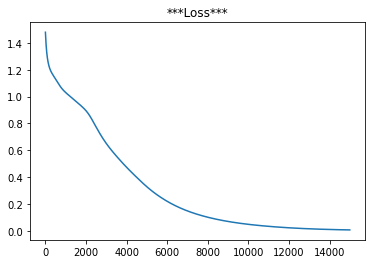

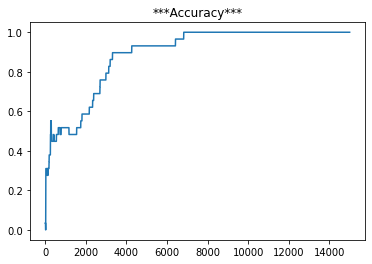

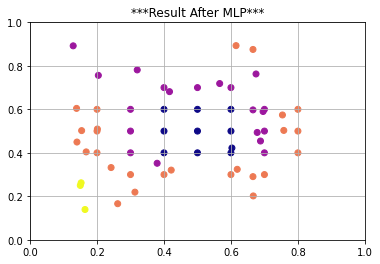

In [8]:
# Q2.3_graded
# Do not change the above line.

mlp = keras.models.Sequential(layers=[keras.layers.Input(2),
                                            keras.layers.Dense(8, activation='tanh'),
                                            keras.layers.Dense(4, activation='softmax')                             
])

mlp.compile( optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
historym = mlp.fit(
    train_x,
    train_y,
    epochs = 15000,
    verbose = 0
)
plt.plot(historym.history['loss'])
plt.title('***Loss***')
plt.show()
plt.plot(historym.history['accuracy'])
plt.title('***Accuracy***')
plt.show()

res = np.argmax(mlp.predict(test_x), axis=1)

plt.scatter(test_x[:, 0], test_x[:, 1], c=res, cmap='plasma')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('***Result After MLP***')
plt.show()

For MLP, we do the same thing with MLP.We use 8 neurons in our hidden layer and we use tanh as our activation function in this layer.
After compilingthe code we see that the loss is almost converged to zero and accuracy is almost 100 percent.

# Q4. Salesman

In [9]:
# Q4_graded
# Do not change the above line.

# Remove this comment and type your codes here

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**4PZD84**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q1_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/yVqZzpw/2.jpg)
  
    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI001_HW2.ipynb`
    - `Q1.py`
    - `Q2.1.py`
    - `Q2.2.py`
    - `Q4.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.